<a href="https://colab.research.google.com/github/AndrewCrossman/PHYS824/blob/main/824Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kwant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.4 MB/s 
  Created wheel for kwant: filename=kwant-1.4.3-cp37-cp37m-linux_x86_64.whl size=3691066 sha256=b0accb7ab2b4248974fc14c5e8acd92517bf393123921916b2ed2a90a2c18882
  Stored in directory: /root/.cache/pip/wheels/d6/2d/93/6f395cd3f0798d7d9e161dce1c8b8c8bbd04d4547763c926de
  Created wheel for tinyarray: filename=tinyarray-1.2.4-cp37-cp37m-linux_x86_64.whl size=227986 sha256=2bcc6f3105d0dcf50d414a0b102870d61c5a9e26529ca91228bd884f5044e8d9
  Stored in directory: /root/.cache/pip/wheels/85/c6/1c/6939e2931cfbff5df75758a06084bf67171b640ebdf5febd35
Successfully built kwant tinyarray


In [ ]:
# Imports
import numpy as np
import kwant 
from numpy.random import rand
from functools import reduce
import scipy.linalg as la
import math
from math import sqrt
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/kwant/solvers/default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


In [ ]:
graphene = kwant.lattice.general([[1, 0], [1/2, np.sqrt(3)/2]],  # lattice vectors
                                 [[0, 0], [0, 1/np.sqrt(3)]])  # Coordinates of the sites
a, b = graphene.sublattices

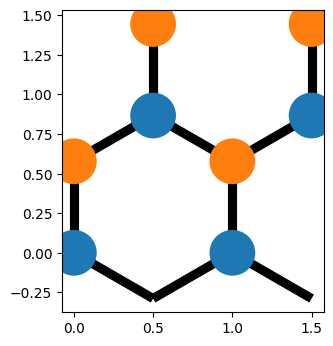

<InfiniteSystem with 10 sites, and 20 hoppings>


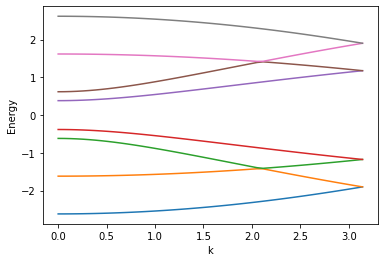

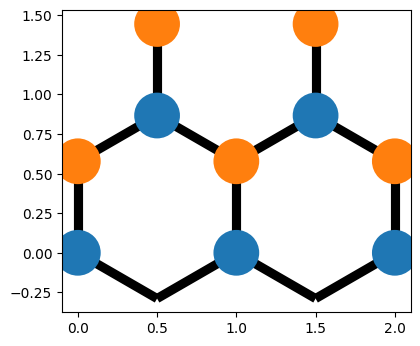

<InfiniteSystem with 12 sites, and 26 hoppings>


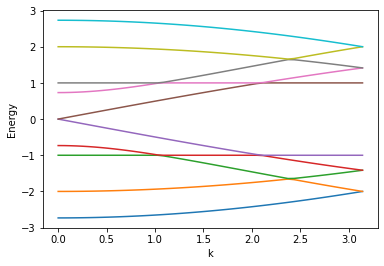

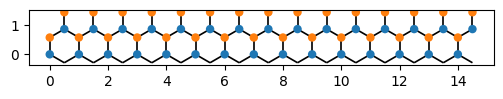

<InfiniteSystem with 75 sites, and 176 hoppings>


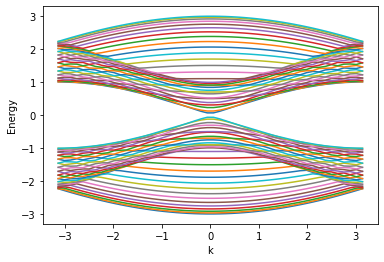

In [ ]:
armchair_ribbon4 = kwant.Builder(kwant.TranslationalSymmetry([0, np.sqrt(3)]))
armchair_ribbon4[graphene.shape((lambda pos: 0<=pos[0]<2), (0, 0))] = 0
armchair_ribbon4[graphene.neighbors(1)] = -1
kwant.plot(armchair_ribbon4, dpi=100);
armchair_ribbon4 = armchair_ribbon4.finalized()   
print(armchair_ribbon4)
k_values = np.linspace(0, np.pi)
kwant.plotter.bands(armchair_ribbon4, momenta=k_values);

armchair_ribbon5 = kwant.Builder(kwant.TranslationalSymmetry([0, np.sqrt(3)]))
armchair_ribbon5[graphene.shape((lambda pos: 0<=pos[0]<2.5), (0, 0))] = 0
armchair_ribbon5[graphene.neighbors(1)] = -1
kwant.plot(armchair_ribbon5, dpi=100);
armchair_ribbon5 = armchair_ribbon5.finalized()   
print(armchair_ribbon5)
k_values = np.linspace(0, np.pi)
kwant.plotter.bands(armchair_ribbon5, momenta=k_values);

armchair_ribbon30 = kwant.Builder(kwant.TranslationalSymmetry([0, np.sqrt(3)]))
armchair_ribbon30[graphene.shape((lambda pos: 0<=pos[0]<15), (0, 0))] = 0
armchair_ribbon30[graphene.neighbors(1)] = -1
kwant.plot(armchair_ribbon30, dpi=100);
armchair_ribbon30 = armchair_ribbon30.finalized()   
print(armchair_ribbon30)
k_values = np.linspace(-np.pi, np.pi)
kwant.plotter.bands(armchair_ribbon30, momenta=k_values);

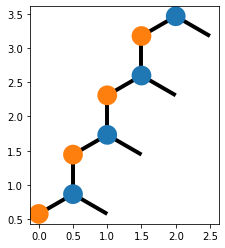

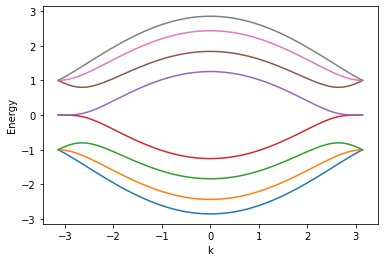

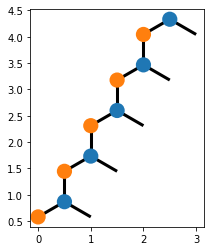

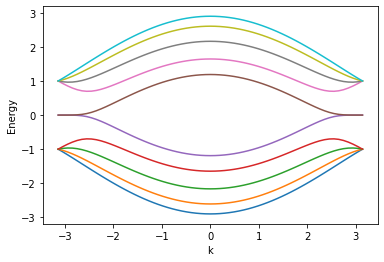

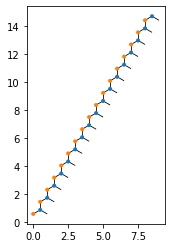

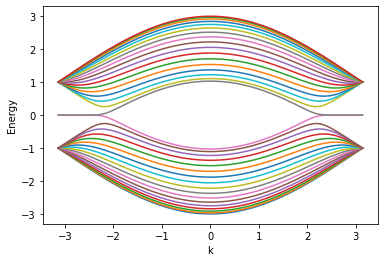

In [ ]:
zigzag_ribbon4 = kwant.Builder(kwant.TranslationalSymmetry([1, 0]))
zigzag_ribbon4[graphene.shape((lambda pos: 0<pos[1]<4), (0, 0))] = 0
zigzag_ribbon4[graphene.neighbors(1)] = 1
kwant.plot(zigzag_ribbon4)
kwant.plotter.bands(zigzag_ribbon4.finalized());

zigzag_ribbon5 = kwant.Builder(kwant.TranslationalSymmetry([1, 0]))
zigzag_ribbon5[graphene.shape((lambda pos: 0<pos[1]<4.5), (0, 0))] = 0
zigzag_ribbon5[graphene.neighbors(1)] = 1
kwant.plot(zigzag_ribbon5)
kwant.plotter.bands(zigzag_ribbon5.finalized());

zigzag_ribbon30 = kwant.Builder(kwant.TranslationalSymmetry([1, 0]))
zigzag_ribbon30[graphene.shape((lambda pos: 0<pos[1]<15), (0, 0))] = 0
zigzag_ribbon30[graphene.neighbors(1)] = 1
kwant.plot(zigzag_ribbon30)
kwant.plotter.bands(zigzag_ribbon30.finalized());

#ldos = kwant.ldos(zigzag_ribbon30.finalized(), energy=2.7*10**-3)
#kwant.plotter.map(zigzag_ribbon30.finalized(), ldos, method='nearest', dpi=200, cmap='viridis', oversampling=20);

In [ ]:
graphene_sys = kwant.Builder()
gr_lat = kwant.lattice.honeycomb(a=1)
def ribbon_sys(pos):
    x, y = pos
    in_x = abs(x) < 10 
    in_y = abs(y) < 12.5
    return in_x and in_y

def ribbon_lead(pos):
    x, y = pos
    return abs(y) < 12.5
graphene_sys[gr_lat.shape(ribbon_sys, (0, 0))] = 0.0
graphene_sys[gr_lat.neighbors(1)] = 2.7
kwant.plot(graphene_sys, dpi=100);
a, b = gr_lat.sublattices
v1, v2 = gr_lat.prim_vecs 
print(v1, v2)
print(2*v2-v1)
left_direction = kwant.TranslationalSymmetry(-v1)

left_lead = kwant.Builder(left_direction)

left_lead[gr_lat.shape(ribbon_lead, (0, 0))] = 0
left_lead[gr_lat.neighbors()] = 2.7

graphene_sys.attach_lead(left_lead)
graphene_sys.attach_lead(left_lead.reversed())
kwant.plot(graphene_sys);
left_lead = left_lead.finalized()
k = np.arange(0, 2*np.pi, 0.01)
kwant.plotter.bands(left_lead, momenta=k, dpi=100);

In [ ]:
# Get all the modes at the given energy
propagating_modes, stabilized_modes = left_lead.modes(energy=10**(-3)*2.7)
# Get wave functions of the propagating modes 
wf = propagating_modes.wave_functions   

print('There are %d sites across the lead,' 
      'and %d modes at this energy' % (wf.shape[0], 
                                       wf.shape[1]))
# Plot the wave function
import matplotlib.pyplot as plt
mode_index = 0

# Plot the second mode   
plt.figure(dpi=140, figsize=(3, 3));
plt.plot(wf[:, 1]*wf[:, 1], color='k', label=r'${\rm\Psi}\left[\Psi\right]$') 
plt.plot(wf[:, 1].imag, color='red', label=r'${\rm Im}\left[\Psi\right]$') 
plt.plot(wf[:, 1].real, color='blue', label=r'${\rm Re}\left[\Psi\right]$')
plt.xlabel('Site Index');
plt.legend()
plt.ylabel(r'$\Psi_i$');

## Subband structure of AGNR and ZGNR using third-nearest neighbor hoppings

In [ ]:
# AGNR N=5
armchair_ribbon5 = kwant.Builder(kwant.TranslationalSymmetry([0, np.sqrt(3)]))
armchair_ribbon5[graphene.shape((lambda pos: 0<=pos[0]<2.5), (0, 0))] = 0
armchair_ribbon5[graphene.neighbors(1)] = -2.7
armchair_ribbon5[graphene.neighbors(2)] = -.2
armchair_ribbon5[graphene.neighbors(3)] = -.18
kwant.plot(armchair_ribbon5, dpi=100);
armchair_ribbon5 = armchair_ribbon5.finalized()   
print(armchair_ribbon5)
k_values = np.linspace(0, np.pi)
kwant.plotter.bands(armchair_ribbon5, momenta=k_values);
kwant.plotter.bands(armchair_ribbon5);

In [ ]:
# ZGNR N=5
zigzag_ribbon5 = kwant.Builder(kwant.TranslationalSymmetry([1, 0]))
zigzag_ribbon5[graphene.shape((lambda pos: 0<pos[1]<4.5), (0, 0))] = 0
zigzag_ribbon5[graphene.neighbors(1)] = -2.7
zigzag_ribbon5[graphene.neighbors(2)] = -.2
zigzag_ribbon5[graphene.neighbors(3)] = -.18
kwant.plot(zigzag_ribbon5)
kwant.plotter.bands(zigzag_ribbon5.finalized());

## Subband structure of GNRs with spin-orbit coupling as topological insulator below 0.5 K

In [ ]:
# define spin matrices
sigma0 = np.array([[1., 0.], [0., 1.]])
sigmax = np.array([[0., 1.], [1., 0.]])
sigmay = np.array([[0., -1j], [1j, 0.]])
sigmaz = np.array([[1., 0.], [0., -1.]])
sigma = np.array([[1j, 0], [0, -1j]])

In [ ]:
# manually construct Hamiltonian
from kwant.builder import HoppingKind 

system = kwant.Builder()
lat = kwant.lattice.honeycomb()
a, b = lat.sublattices             # Get the A and B sublattices


system[gr_lat.shape(ribbon_sys, (0, 0))] = 0.0

t = 2.7

# Connect sites A and B in the same unit cell 
system[HoppingKind((0, 0), b, a)] = -t*sigma0    
# Connect A to a lower-right B site
system[HoppingKind((1, -1), b, a)] = -t*sigma0      
# Connect A to a lower-left B site
system[HoppingKind((0, -1), b, a)] = -t*sigma0      

# Connect A to upper-right  A (NNN hopping)  site
system[HoppingKind((0, 1), a, a)] = -t*0.03*sigma    
# Connect A to upper-left  A (NNN hopping)  site
system[HoppingKind((-1, 1), a, a)] = -t*0.03*sigma     
# Connect A to A horizontally  (NNN hopping)  site
system[HoppingKind((1, 0), a, a)] = -t*0.03*sigma     

# Connect B to upper-right  B (NNN hopping)  site
system[HoppingKind((0, 1), b, b)] = -t*0.03*sigma     
# Connect B to upper-left  B (NNN hopping)  site
system[HoppingKind((-1, 1), b, b)] = -t*0.03*sigma     
# Connect B to B horizontally  (NNN hopping)  site
system[HoppingKind((1, 0), b, b)] = -t*0.03*sigma   

kwant.plot(system, dpi=100);
newsys = system.finalized();
kwant.plotter.bands(newsys);

## Subband structure of nanowires carved from graphene/WSe2 van der Waals heterostructure